In [23]:
dir = 'D:/projects/datascience/bfu-ml-labs/animeee'

In [24]:
random_state = 123

In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv(f'{dir}/reviews.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192112 non-null  int64 
 1   profile    192112 non-null  object
 2   anime_uid  192112 non-null  int64 
 3   text       192112 non-null  object
 4   score      192112 non-null  int64 
 5   scores     192112 non-null  object
 6   link       192112 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.3+ MB


### Датасет очень большой, а ресурсы ограничены. Обрежем его, случайным образом отобрав только часть данных.

In [28]:
df = df.sample(frac=0.1, random_state=random_state)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19211 entries, 42299 to 90590
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uid        19211 non-null  int64 
 1   profile    19211 non-null  object
 2   anime_uid  19211 non-null  int64 
 3   text       19211 non-null  object
 4   score      19211 non-null  int64 
 5   scores     19211 non-null  object
 6   link       19211 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.2+ MB


In [30]:
df.sample(5, random_state=random_state)

,uid,profile,anime_uid,text,score,scores,link
119819,271034,mr57757,34822,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '8', 'Animation': '...",https://myanimelist.net/reviews.php?id=271034
167422,127885,Playcool,15699,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '6', 'Animation': '1...",https://myanimelist.net/reviews.php?id=127885
135632,312406,Therazeflip,39337,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '4', 'Animation': '8...",https://myanimelist.net/reviews.php?id=312406
141632,257304,milkyvenus_,13601,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=257304
101573,244715,themegamancave,33206,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=244715


In [31]:
df = df[['text', 'score']]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19211 entries, 42299 to 90590
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    19211 non-null  object
 1   score   19211 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 450.3+ KB


In [33]:
df.sample(5, random_state=random_state)

,text,score
119819,\n \n \n \n ...,10
167422,\n \n \n \n ...,9
135632,\n \n \n \n ...,6
141632,\n \n \n \n ...,9
101573,\n \n \n \n ...,8


# Изучим распределение данных

Посмотрим, сколько отзывов в датасете соответствует каждой из оценок (1-10).

In [34]:
import matplotlib.pyplot as plt

In [35]:
def show_ratings_counts():
    ratings_counts = df['score'].value_counts().sort_index()

    plt.figure(figsize=(10, 5))
    plt.bar(ratings_counts.index, ratings_counts.values)
    plt.xticks(range(1, 11))
    plt.title('Распределение Оценок')
    plt.xlabel('Оценка (1-10)')
    plt.ylabel('Количество отзывов')
    plt.grid(True)
    plt.show()

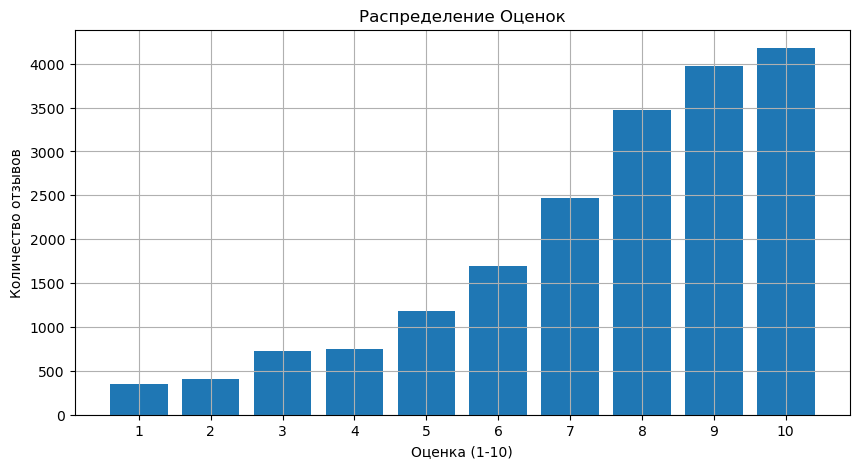

In [36]:
show_ratings_counts()

In [37]:
len(df[df['score'] > 5]) / len(df)

0.8219249388371246

### Более 80% всех рейтингов имеют оценку 6-10. Менее 20% зрителей ставят оценки 5 и ниже.

Это может сказаться на качестве предсказаний. Но пока ничего предпринимать не будем.

In [40]:
df['text'].iloc[500]

'\n           \n         \n           \n             \n           \n         \n         \n           more pics \n         \n       \n         \n       \n         \n           Overall \n           9 \n         \n         \n           Story \n           8 \n         \n                   \n             Animation \n             10 \n           \n           \n             Sound \n             10 \n           \n                 \n           Character \n           10 \n         \n         \n           Enjoyment \n           10 \n         \n       \n     \n\n                    \n    Basicly you still can get clear story and enjoyment from watching this sequel, so don\'t miss it. It still provide nice slice of life element and some moral values. \r\nBut i\'m a little bit disappointed with this sequel, it is too short and moving/end too fast, it would be better if some good scene from the webtoon was not removed, it would be much better if some scene was included. \r\nThe webtoon version is mad

### В тексте (признаках) уже присутствуют ответы!

Видим, что некоторые (если не все) обзоры начинаются со слов (или содержат слова) вроде "Overall 9" или "Animation 10", которые могут "подсказать" модели правильные ответы. Избавимся от всех цифр в текстах датасета -- всё равно они в нашем контексте не несут никакой пользы.

In [41]:
import re


df['text'] = df['text'].apply(lambda text: re.sub(r'\d+', '', text))

In [42]:
df['text'].iloc[500]

'\n           \n         \n           \n             \n           \n         \n         \n           more pics \n         \n       \n         \n       \n         \n           Overall \n            \n         \n         \n           Story \n            \n         \n                   \n             Animation \n              \n           \n           \n             Sound \n              \n           \n                 \n           Character \n            \n         \n         \n           Enjoyment \n            \n         \n       \n     \n\n                    \n    Basicly you still can get clear story and enjoyment from watching this sequel, so don\'t miss it. It still provide nice slice of life element and some moral values. \r\nBut i\'m a little bit disappointed with this sequel, it is too short and moving/end too fast, it would be better if some good scene from the webtoon was not removed, it would be much better if some scene was included. \r\nThe webtoon version is made more chr

In [43]:
from sklearn.model_selection import train_test_split

X = df['text']  # ВАЖНО: df['text'] (тип pd.Series), а не df[['text']] (тип pd.DataFrame) -- иначе vectorizer'ам будет плохо
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13447,), (5764,), (13447,), (5764,))

# Регрессия на необработанных n-граммах

Начнём эксперименты с простейшей модели, которой на вход подадим простейшие, не обработанные надлежащим образом данные.

Мы хотим предсказывать рейтинг аниме на основе текстового содержимого отзывов. Поскольку рейтинги зачастую отображаются как дробные числа (например, 7.41), мы будем использовать не классификацию, а регрессию.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
vectorizer = CountVectorizer(ngram_range=(1, 1))

In [46]:
print(f'Preprocessing...')
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

Preprocessing...


In [47]:
len(vectorizer.vocabulary_)

66914

In [48]:
list(vectorizer.vocabulary_.items())[:5]

[('more', 37887),
 ('pics', 43723),
 ('overall', 41897),
 ('story', 55896),
 ('animation', 2382)]

In [49]:
X_train_v.shape

(13447, 66914)

In [50]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression

model = LinearRegression()
print(f'Training...')
model.fit(X_train_v, y_train)

Training...


LinearRegression()

In [51]:
y_pred = model.predict(X_test_v)

In [52]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


def evaluate_model(model_, X_train_, X_test_, y_train_, y_test_):
    df = pd.DataFrame(index=['train', 'test'], columns=['R2', 'RMSE', 'MAPE'])

    # Train
    y_train_pred = model_.predict(X_train_)
    df.loc['train', 'R2'] = r2_score(y_train_, y_train_pred)
    df.loc['train', 'RMSE'] = np.sqrt(mean_squared_error(y_train_, y_train_pred))
    df.loc['train', 'MAPE'] = round(100. * mean_absolute_percentage_error(y_train_, y_train_pred), 1)

    # Test
    y_test_pred = model_.predict(X_test_)
    df.loc['test', 'R2'] = r2_score(y_test_, y_test_pred)
    df.loc['test', 'RMSE'] = np.sqrt(mean_squared_error(y_test_, y_test_pred))
    df.loc['test', 'MAPE'] = round(100. * mean_absolute_percentage_error(y_test_, y_test_pred), 1)

    return df

In [53]:
print(f'Testing...')
evaluate_model(model, X_train_v, X_test_v, y_train, y_test)

Testing...


,R2,RMSE,MAPE
train,0.999637,0.043409,0.3
test,-2.419829,4.151639,53.0


In [54]:
np.sum(abs(model.coef_)), np.sum(abs(model.coef_) > 0.0001), len(model.coef_)

(10739.730715690584, 66850, 66914)

### Модель сильно переобучилась.

### Попробуем воспользоваться L2-регуляризацией.

In [55]:
model = Ridge(random_state=random_state, max_iter=2000, alpha=1000.)
print(f'Training...')
model.fit(X_train_v, y_train)
print(f'Testing...')
evaluate_model(model, X_train_v, X_test_v, y_train, y_test)

Training...
Testing...


,R2,RMSE,MAPE
train,0.567081,1.498515,26.1
test,0.410494,1.723699,30.2


In [56]:
np.sum(abs(model.coef_)), np.sum(abs(model.coef_) > 0.0001), len(model.coef_)

(243.04144427149927, 63873, 66914)

### Так себе, но уже хоть что-то.

### Попробуем L1-регуляризацию.

In [57]:
model = Lasso(random_state=random_state, max_iter=2000, alpha=1.)
print(f'Training...')
model.fit(X_train_v, y_train)
print(f'Testing...')
evaluate_model(model, X_train_v, X_test_v, y_train, y_test)

Training...
Testing...


,R2,RMSE,MAPE
train,0.010465,2.265547,43.3
test,0.003408,2.241177,41.9


In [58]:
np.sum(abs(model.coef_)), np.sum(abs(model.coef_) > 0.0001), len(model.coef_)

(0.012683577669485642, 1, 66914)

### Ввиду особенностей наших данных и векторизации, Lasso выполняет "отбор признаков" слишком "агрессивно" -- почти все веса обнуляются даже при малых значениях коэффициента `alpha`. Пока остановимся на модели Ridge.

### Попробуем взять более длинные n-граммы (n = 2)

In [59]:
print(f'Preprocessing...')
vectorizer = CountVectorizer(ngram_range=(2, 2))
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)
print(f'Vectorizer vocabulary: {len(vectorizer.vocabulary_)}')
print(f'Vectorization samples: {list(vectorizer.vocabulary_.items())[:5]}')
print(f'Vectorized train data shape: {X_train_v.shape}')

model = Ridge(random_state=random_state, max_iter=2000, alpha=1000.)
print(f'Training...')
model.fit(X_train_v, y_train)
print(f'Testing...')
evaluate_model(model, X_train_v, X_test_v, y_train, y_test)

Preprocessing...
Vectorizer vocabulary: 1278356
Vectorization samples: [('more pics', 702941), ('pics overall', 831672), ('overall story', 806394), ('story animation', 1032891), ('animation sound', 64407)]
Vectorized train data shape: (13447, 1278356)
Training...
Testing...


,R2,RMSE,MAPE
train,0.645852,1.355345,23.8
test,0.388641,1.755357,31.4


In [60]:
np.sum(abs(model.coef_)), np.sum(abs(model.coef_) > 0.0001), len(model.coef_)

(1632.2113934691024, 1177316, 1278356)

### Попробуем n = 3

In [61]:
print(f'Preprocessing...')
vectorizer = CountVectorizer(ngram_range=(3, 3))
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)
print(f'Vectorizer vocabulary: {len(vectorizer.vocabulary_)}')
print(f'Vectorization samples: {list(vectorizer.vocabulary_.items())[:5]}')
print(f'Vectorized train data shape: {X_train_v.shape}')

model = Ridge(random_state=random_state, max_iter=2000, alpha=1000.)
print(f'Training...')
model.fit(X_train_v, y_train)
print(f'Testing...')
evaluate_model(model, X_train_v, X_test_v, y_train, y_test)

Preprocessing...
Vectorizer vocabulary: 3650738
Vectorization samples: [('more pics overall', 1926871), ('pics overall story', 2307600), ('overall story animation', 2252731), ('story animation sound', 2792370), ('animation sound character', 225911)]
Vectorized train data shape: (13447, 3650738)
Training...
Testing...


,R2,RMSE,MAPE
train,0.580844,1.474502,26.8
test,0.253923,1.93914,35.7


In [62]:
np.sum(abs(model.coef_)), np.sum(abs(model.coef_) > 0.0001), len(model.coef_)

(3876.165034111477, 3363751, 3650738)

### Попробуем диапазон n-грамм для n=1,2

In [63]:
print(f'Preprocessing...')
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)
print(f'Vectorizer vocabulary: {len(vectorizer.vocabulary_)}')
print(f'Vectorization samples: {list(vectorizer.vocabulary_.items())[:5]}')
print(f'Vectorized train data shape: {X_train_v.shape}')

model = Ridge(random_state=random_state, max_iter=2000, alpha=1000.)
print(f'Training...')
model.fit(X_train_v, y_train)
print(f'Testing...')
evaluate_model(model, X_train_v, X_test_v, y_train, y_test)

Preprocessing...
Vectorizer vocabulary: 1345270
Vectorization samples: [('more', 738698), ('pics', 875390), ('overall', 847257), ('story', 1088692), ('animation', 65888)]
Vectorized train data shape: (13447, 1345270)
Training...
Testing...


,R2,RMSE,MAPE
train,0.726523,1.191016,20.1
test,0.430344,1.69443,29.4


In [64]:
np.sum(abs(model.coef_)), np.sum(abs(model.coef_) > 0.0001), len(model.coef_)

(1496.7711892898853, 1213625, 1345270)

### Любые попытки увеличить n приводят к переобучению линейных моделей.

Остановимся пока на `n = 1`.

### Пробуем метод опорных векторов (сразу с n = 1)

Учитываем, что SVM особо чувствителен к масштабу данных. Так что применим масштабирование.

In [65]:
print(f'Preprocessing...')
vectorizer = CountVectorizer(ngram_range=(1, 1))
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)
print(f'Vectorizer vocabulary: {len(vectorizer.vocabulary_)}')
print(f'Vectorization samples: {list(vectorizer.vocabulary_.items())[:5]}')
print(f'Vectorized train data shape: {X_train_v.shape}')


from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler


scaler = MaxAbsScaler()
X_train_vs = scaler.fit_transform(X_train_v)
X_test_vs = scaler.transform(X_test_v)


model = SVR(max_iter=5000)
print(f'Training...')
model.fit(X_train_vs, y_train)
print(f'Testing...')
evaluate_model(model, X_train_vs, X_test_vs, y_train, y_test)

Preprocessing...
Vectorizer vocabulary: 66914
Vectorization samples: [('more', 37887), ('pics', 43723), ('overall', 41897), ('story', 55896), ('animation', 2382)]
Vectorized train data shape: (13447, 66914)
Training...


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Testing...


,R2,RMSE,MAPE
train,0.615559,1.412123,26.5
test,0.368186,1.784481,33.5


### Модель сильно подвергается переобучению.

### Попробуем дерево решений. (n_grams = 1)

In [66]:
print(f'Preprocessing...')
vectorizer = CountVectorizer(ngram_range=(1, 1))
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)
print(f'Vectorizer vocabulary: {len(vectorizer.vocabulary_)}')
print(f'Vectorization samples: {list(vectorizer.vocabulary_.items())[:5]}')
print(f'Vectorized train data shape: {X_train_v.shape}')


from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor(random_state=random_state, max_depth=5)
print(f'Training...')
model.fit(X_train_v, y_train)
print(f'Testing...')
evaluate_model(model, X_train_v, X_test_v, y_train, y_test)

Preprocessing...
Vectorizer vocabulary: 66914
Vectorization samples: [('more', 37887), ('pics', 43723), ('overall', 41897), ('story', 55896), ('animation', 2382)]
Vectorized train data shape: (13447, 66914)
Training...
Testing...


,R2,RMSE,MAPE
train,0.205853,2.029588,36.2
test,0.142087,2.079405,36.7


### Дереву плохо при любом количестве n-грамм и при любом значении глубины.

### Попробуем ансамбль из XGBoost.

In [67]:
print(f'Preprocessing...')
vectorizer = CountVectorizer(ngram_range=(1, 1))
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)
print(f'Vectorizer vocabulary: {len(vectorizer.vocabulary_)}')
print(f'Vectorization samples: {list(vectorizer.vocabulary_.items())[:5]}')
print(f'Vectorized train data shape: {X_train_v.shape}')


import xgboost as xgb


model = xgb.XGBRegressor(
    random_state=random_state,
    max_depth=3,
    objective='reg:squarederror',
    reg_alpha=10.,
    reg_lambda=10.,
)
print(f'Training...')
model.fit(X_train_v, y_train)
print(f'Testing...')
evaluate_model(model, X_train_v, X_test_v, y_train, y_test)

Preprocessing...
Vectorizer vocabulary: 66914
Vectorization samples: [('more', 37887), ('pics', 43723), ('overall', 41897), ('story', 55896), ('animation', 2382)]
Vectorized train data shape: (13447, 66914)
Training...
Testing...


,R2,RMSE,MAPE
train,0.60094,1.438721,24.1
test,0.478119,1.621821,27.8


### Попробуем нейросети. Может, получится лучше отловить какие-то нелинейные зависимости в данных.

Нейросети чувствительны к масштабу, так что здесь тоже масштабируем данные.

In [69]:
print(f'Preprocessing...')
vectorizer = CountVectorizer(ngram_range=(1, 1))
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)
print(f'Vectorizer vocabulary: {len(vectorizer.vocabulary_)}')
print(f'Vectorization samples: {list(vectorizer.vocabulary_.items())[:5]}')
print(f'Vectorized train data shape: {X_train_v.shape}')


scaler = MaxAbsScaler()
X_train_vs = scaler.fit_transform(X_train_v)
X_test_vs = scaler.transform(X_test_v)


from sklearn.neural_network import MLPRegressor


model = MLPRegressor(
    random_state=random_state,
    hidden_layer_sizes=(128, 64),
    activation='relu',
    alpha=10.,
)
print(f'Training...')
model.fit(X_train_vs, y_train)
print(f'Testing...')
evaluate_model(model, X_train_vs, X_test_vs, y_train, y_test)

Preprocessing...
Vectorizer vocabulary: 66914
Vectorization samples: [('more', 37887), ('pics', 43723), ('overall', 41897), ('story', 55896), ('animation', 2382)]
Vectorized train data shape: (13447, 66914)
Training...
Testing...


,R2,RMSE,MAPE
train,0.826831,0.947747,14.5
test,0.491713,1.600559,26.7


### Из нейросети получилось выжать лучший результат на тестовых данных, однако она довольно сильно переобучается.

### Пока что модель XGB с n_grams=1 -- лучший кандидат.

# Обработаем входные данные

Удалим ненужные слова и символы, сведём всё к единому формату.

In [91]:
from nltk.corpus import stopwords
from string import punctuation
from nltk import word_tokenize

noise = stopwords.words('english') + list(punctuation)
print(f'noise len: {len(noise)}')
print(f'noise sample: ... {noise[170:190]} ...')

noise len: 211
noise sample: ... ["shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+'] ...


In [117]:
import re


def preproc(text: str) -> str:
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = text.replace('more pics overall story animation sound character enjoyment', '')
    text = text.replace('helpful', '')
    text = text.strip()
    return text

In [93]:
print(f'Preprocessing...')

X_train_p = X_train.apply(preproc)
X_test_p = X_test.apply(preproc)

Preprocessing...


In [94]:
X_test_p.iloc[100]

'deadman wonderland is heartfelt and painfully human.one of the most original stories i have read.the story is a of in my opinion. its unique and terrifying.it has something other stories lack and thats uniqueness.the thought of a middle school student framed for the murder of his best friends,and being sent to a prison filled with psycho paths,and having to fight to the death,is so surprising,so warm and yet so chilling.the only thing that pissed me the hell off was the fact that the anime got cut short.it had a unfinished feel to it,do to low view stats.the manga still is a out of ,because its still running.but for the anime i cant say the same. its a of at best,because there was so much unexplained.the anime left out so much good materiel,and it was a shame because it had awesome art and good english dub voice actors.over all i was left with a emptiness in my heart after watching the anime.it had such good side character but did jack shit with them.in the manga it has the full endin

In [95]:
vectorizer = CountVectorizer(
    ngram_range=(1, 1),
    token_pattern=None,
    tokenizer=word_tokenize,
    stop_words=noise,
)

X_train_vp = vectorizer.fit_transform(X_train_p)
X_test_vp = vectorizer.transform(X_test_p)

print(f'Vectorizer vocabulary: {len(vectorizer.vocabulary_)}')
print(f'Vectorization samples: {list(vectorizer.vocabulary_.items())[:5]}')
print(f'Vectorized train data shape: {X_train_vp.shape}')

D:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Vectorizer vocabulary: 88651
Vectorization samples: [('excellent', 26539), ('winter', 85586), ('anime', 5932), ('seriously', 68950), ("n't", 51538)]
Vectorized train data shape: (13447, 88651)


### Обучим нашу лучшую модель на "чистых" данных

In [97]:
model = xgb.XGBRegressor(
    random_state=random_state,
    max_depth=3,
    objective='reg:squarederror',
    reg_alpha=10.,
    reg_lambda=10.,
)
print(f'Training...')
model.fit(X_train_vp, y_train)
print(f'Testing...')
evaluate_model(model, X_train_vp, X_test_vp, y_train, y_test)

Training...
Testing...


,R2,RMSE,MAPE
train,0.58172,1.47296,24.8
test,0.466332,1.640035,28.3


### Результат стал чуть хуже, однако эффект переобучения уменьшился.

### Проведём немного ручных тестов.

In [100]:
def manual_test(model_, text: str) -> float:
    X_test_manual = pd.Series([text])
    X_test_manual_p = X_test_manual.apply(preproc)
    X_test_manual_vp = vectorizer.transform(X_test_manual_p)
    return model_.predict(X_test_manual_vp)[0]

In [114]:
manual_test(model, 'Loving it! Best anime ever! The story is excellent, the drawing style is picturesque, the plot is so intriguing! Totally worth watching. The characters are so cute and adorable that you cant miss this! The romantic storyline was probably on par with Clannad itself. The voice actors did their best to ensure full immersion.')

8.125796

In [112]:
manual_test(model, 'Absolute trash! I dont understand how could anybody ever watch this. Dropped halfway, wont even consider finishing this. I really cant imagine an anime being as bad as this one. This is legit the worst way to spend your time in the world. Why? The drawing is okay I mean. But the story. Wtf. Is like some drunk unskilled writer did it in under 5 mins. Literally no sense.')

4.755459

### В целом, неплохо. Попробуем дать модели больше данных и посмотрим, как это повлияет на её точность.

In [146]:
#############################################################################################################

print(f'Reading...')

df = pd.read_csv(f'{dir}/reviews.csv')
df = df.sample(frac=0.5, random_state=random_state)
df = df[['text', 'score']]
X = df['text']
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

Reading...


In [147]:
print(f'Preprocessing...')

X_train_p = X_train.apply(preproc)
X_test_p = X_test.apply(preproc)

vectorizer = CountVectorizer(
    ngram_range=(1, 1),
    token_pattern=None,
    tokenizer=word_tokenize,
    stop_words=noise,
)

X_train_vp = vectorizer.fit_transform(X_train_p)
X_test_vp = vectorizer.transform(X_test_p)

print(f'Vectorizer vocabulary: {len(vectorizer.vocabulary_)}')
print(f'Vectorization samples: {list(vectorizer.vocabulary_.items())[:5]}')
print(f'Vectorized train data shape: {X_train_vp.shape}')

Preprocessing...


D:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Vectorizer vocabulary: 212827
Vectorization samples: [('pics', 140669), ('overall', 135524), ('story', 176990), ('animation', 15999), ('sound', 173456)]
Vectorized train data shape: (67239, 212827)


In [148]:
print(f'Training...')


from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay


rmse_scorer = make_scorer(lambda y_true, y_pred:
                          np.sqrt(mean_squared_error(y_true, y_pred)))

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train_vp,
    y_train,
    cv=3,
    scoring=rmse_scorer,
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=random_state
)

Training...


In [149]:
display = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores,
    test_scores=test_scores,
    score_name='RMSE',
)

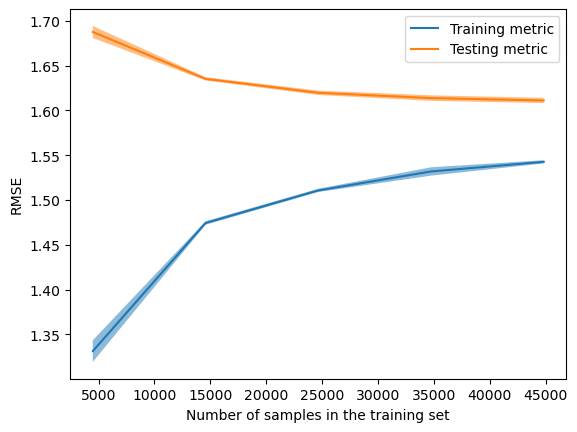

In [150]:
display.plot(score_type='both')

In [155]:
len(train_scores), len(test_scores)

(5, 5)

In [151]:
train_scores

array([[1.33217899, 1.31624927, 1.34578441],
       [1.47467712, 1.47176991, 1.47661168],
       [1.51329027, 1.50969095, 1.50923967],
       [1.5360074 , 1.53421592, 1.5253732 ],
       [1.54160415, 1.54516239, 1.541118  ]])

In [152]:
test_scores

array([[1.69494444, 1.67866173, 1.68907935],
       [1.63389163, 1.63784739, 1.63394122],
       [1.61923252, 1.62285192, 1.61693016],
       [1.61734077, 1.61415762, 1.60974759],
       [1.61515299, 1.60829498, 1.60986677]])

In [156]:
best_score = np.min(np.mean(test_scores))
best_train_samples = np.argmin(np.mean(test_scores))
best_score, best_train_samples

(1.6334627384792961, 0)

### Видно, что алгоритм сходится, хоть и довольно медленно.

При 45K входных образцов качество модели немного улучшилось (по сравнению с 13K образцов). Однако для получения ещё более существенного улучшения качества потребуется либо гораздо больше данных (возможно, сотни тысяч или даже миллионы образцов), подбор более качественной модели, либо же ещё более умная предобработка данных (токенизация, векторизация...).